<a href="https://colab.research.google.com/github/denisbob31/Cours-ACP/blob/main/Cours_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importer les données

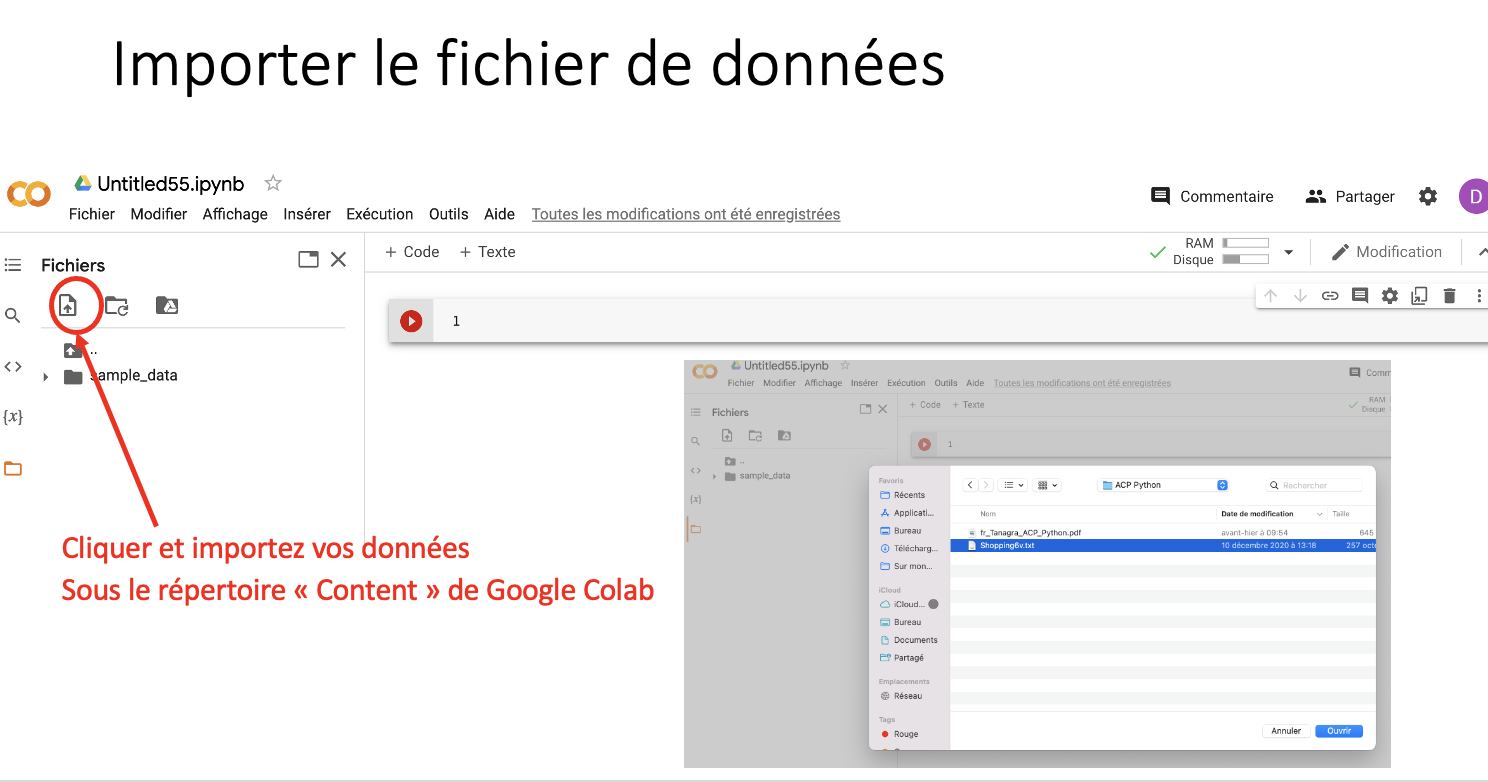

In [4]:
# importer la bibliothèque pandas
import pandas as pd

# importer les données
data_original=pd.read_csv('/content/Shopping6v.txt', sep="\t")

data = data_original
# afficher les statistiques descriptives
data.describe()

,V1,V2,V3,V4,V5,V6
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.850000,4.100000,3.950000,4.100000,3.450000,4.350000
std,1.899446,1.410487,2.012461,1.518309,1.761429,1.496487
min,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
25%,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,3.500000,4.000000
75%,5.250000,5.000000,6.000000,5.250000,4.250000,5.250000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Importer les bibliothèques utiles

In [20]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

Préparation des données

In [16]:
#nombre d'observations
n = data.shape[0]
#nombre de variables
p = data.shape[1]
###############################
# PREPARATION DES DONNEES : centrer réduire
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
zData = sc.fit_transform(data)
print('type de zData :',type(zData))
print(zData)
print('moyenne : ',zData.mean(), 'ecart-type : ',zData.std())
###############################

type de zData : <class 'numpy.ndarray'>
[[ 1.16131418 -0.0727393   1.55492886 -0.74331112 -0.84458059 -0.92554808]
 [-0.99927034 -0.80013226 -1.50394759 -0.06757374  0.90282753 -0.23995691]
 [ 1.70146031 -1.52752523  1.04511612 -0.06757374 -1.42704996 -0.92554808]
 [ 0.08102192  1.38204664  0.02549064  0.60816364 -0.26211122  1.13122543]
 [-1.53941647 -0.80013226 -0.99413485 -1.41904849  1.4852969  -0.23995691]
 [ 1.16131418 -0.0727393   1.04511612 -0.74331112 -0.26211122 -0.23995691]
 [ 0.62116805 -0.80013226  1.04511612 -0.74331112 -0.26211122 -0.23995691]
 [ 1.70146031 -0.80013226  1.55492886 -0.06757374 -1.42704996 -0.23995691]
 [-0.99927034 -0.0727393  -0.4843221  -0.74331112  1.4852969  -0.92554808]
 [-0.45912421  0.65465367 -0.4843221   1.28390102  0.32035815  1.13122543]
 [-1.53941647 -0.80013226 -0.99413485 -0.74331112  0.90282753 -0.92554808]
 [ 0.62116805 -0.0727393   0.53530338 -0.06757374 -0.84458059 -0.23995691]
 [-0.99927034 -1.52752523 -1.50394759  0.60816364  0.3203581

In [36]:
#INSTANCIATION
acpData = PCA(svd_solver='full')

#CALCULS
coordData = acpData.fit_transform(zData)
print(coordData)
print(coordData.shape)
#nombre de composantes calculées
print('Nombre de composantes : ',acpData.n_components_)


[[ 2.10115014 -0.94782418 -0.51366922  0.34725341 -0.3946536   0.20203308]
 [-1.94011207 -0.6892083   0.53706767 -0.03017942  0.44105131 -0.23437706]
 [ 2.37233676 -1.26144797  1.19830499  0.74787203 -0.02758547 -0.05481027]
 [ 0.16317076  1.81689879 -0.50174711 -0.20641898  0.10495888 -0.04880866]
 [-2.11149147 -1.57749953 -0.35762379 -1.0569824   0.25360738 -0.13920966]
 [ 1.51339332 -0.59499528 -0.39378663 -0.10227804 -0.37641522 -0.41642108]
 [ 1.1993851  -1.01919428  0.15187507 -0.41015566 -0.35728671 -0.02988363]
 [ 2.68369544 -0.48157351  0.69713106  0.25313267 -0.25941519  0.01006684]
 [-1.6285049  -1.19709127 -0.77476325 -0.05244484 -0.40571906 -0.03139141]
 [-0.85781563  1.73028491  0.36086534 -0.13001162 -0.16651818  0.00692003]
 [-1.90425183 -1.51734121 -0.0627974  -0.14401175  0.32770779  0.40248273]
 [ 1.14158404 -0.12206757  0.08261937  0.2823886   0.14769193  0.16326529]
 [-1.70222371 -0.6381033   1.56271185  0.22530673  0.55528497  0.13375473]
 [-0.22870386  2.525621  

Variance expliquée : [2.80464018 2.26304174 0.49753191 0.45573608 0.227898   0.06694157]
eigval : [2.66440817 2.14988965 0.47265531 0.43294927 0.2165031  0.0635945 ]
PROPORTION DE VARIANCE EXPLIQUEE :
[0.44406803 0.35831494 0.07877589 0.07215821 0.03608385 0.01059908]


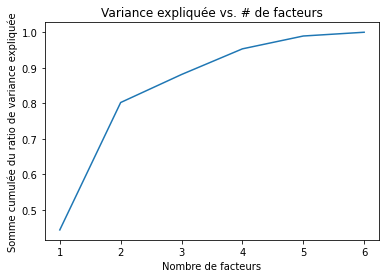

In [32]:
#variance expliquée
print('Variance expliquée :', acpData.explained_variance_)
#valeur corrigée
eigval = (n-1)/n*acpData.explained_variance_
print('eigval :', eigval)
#proportion de variance expliquée
print('PROPORTION DE VARIANCE EXPLIQUEE :')
print(acpData.explained_variance_ratio_)

###############################
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acpData.explained_variance_ratio_))
plt.title("Variance expliquée vs. # de facteurs")
plt.ylabel("Somme cumulée du ratio de variance expliquée")
plt.xlabel("Nombre de facteurs")
plt.show()
###############################

Détermination du nombre de facteur à retenir


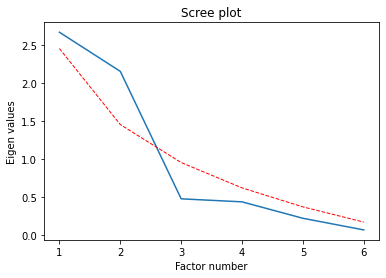

In [29]:
#Détermination du nombre de facteur à retenir
print("Détermination du nombre de facteur à retenir")

# TEST DU COUDE
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Numéro du facteur")

#seuils pour test des bâtons brisés
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))
plt.plot(range(1,p+1),b,"r--",linewidth=1)
plt.show()
#print(b)